# STSA Python pattern: Houston Flood data


![Hurricane Harvey](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/Harvey.png)

NASA TERRA MODIS INFRARED IMAGE OF HARVEY AT 0419 UTC 26 AUGUST 2017 JUST AFTER LANDFALL AS A
CATEGORY 4 HURRICANE IN TEXAS. IMAGE COURTESY OF UW/CIMSS. g

## 1.0 Install dependencies and import packages

### 1.1 Install pixiedust

We install the prerequisites using the `!pip install` syntax here.
In some cases, running pip install from a notebook may require a one-time kernel restart. Check the output for messages.
If instructed to restart the kernel, from the notebook toolbar menu: • Go to > Kernel > Restart • Click Restart in the confirmation dialog
> Note: The status of the kernel briefly flashes near the upper right corner, alerting when it is Not Connected, Restarting, Ready, etc. 

In [1]:
!pip install --upgrade pixiedust

Requirement already up-to-date: pixiedust in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s49d-fa6eebe94d4691-2ef1a5e3ed71/.local/lib/python3.5/site-packages (1.1.15)
Requirement not upgraded as not directly required: colour in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (0.1.5)
Requirement not upgraded as not directly required: lxml in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (4.1.0)
Requirement not upgraded as not directly required: geojson in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (1.3.5)
Requirement not upgraded as not directly required: astunparse in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (1.5.0)
Requirement not upgraded as not directly required: requests in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-S

### 1.2 Import the packages
Numpy is a package for scientific computing in Python.  
Pandas helps with data structures.  
[Pixiedust](https://pixiedust.github.io/pixiedust/) is a Python helper library for Jupyter notebooks.

In [2]:
import pandas as pd
import numpy as np
import pixiedust

Pixiedust database opened successfully


## 2.0 Obtain and curate data

In order to do data science, or data engineering, we'll need some data.
So, what problem are we trying to solve?

### Where in Houston does flooding occur, and which specific adresses are vulnerable?

### 2.1 Search for data
We are interested in the flooding in Houston on August, 2017, as a result of Hurricane Harvey.
Using a search engine, we can try `houston flood 2017 data`.  
That gave many results, mostly news stories. But there are some promising sites, many from US government agencies:  
* https://www.weather.gov
* https://txpub.usgs.gov/floodwatch/#page-top
* https://water.weather.gov/ahps2/index.php?wfo=hgx
* https://www.nhc.noaa.gov/data/tcr/AL092017_Harvey.pdf
* https://stn.wim.usgs.gov/STNDataPortal/#
* https://streamstats.usgs.gov/ss/

That's just the beginning, but hopefully it can lead to some data we can use.

### 2.2 Download and examine data

We'll use some data that has been cleaned up a bit to expedite things.
* Column headers have been renamed to make more sense
* Unimportant features (columns) have been removed
* Latitude and longitude have been added
* Location name has been added

In [3]:
!wget 'https://www.dropbox.com/s/hrxu2qwcsosrxf5/HuntingBayou.csv?dl=0'

--2019-03-05 17:11:57--  https://www.dropbox.com/s/hrxu2qwcsosrxf5/HuntingBayou.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hrxu2qwcsosrxf5/HuntingBayou.csv [following]
--2019-03-05 17:11:57--  https://www.dropbox.com/s/raw/hrxu2qwcsosrxf5/HuntingBayou.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb53af2ca12cec17135c0d25df7.dl.dropboxusercontent.com/cd/0/inline/AchLCE3BJ-1lL-Ksnp14i9WPdp2W-7CKf2eMJbUkhBsUds29L7hz16BCCtotlO0J-yvdn8FMeD1wd65bjgiQzmWJl1dTvs7Zz4sD7kSq6zIDoSxbw00DxF9lEV-ruUBp7GU/file# [following]
--2019-03-05 17:11:57--  https://ucb53af2ca12cec17135c0d25df7.dl.dropboxusercontent.com/cd/0/inline/AchLCE3BJ-1lL-Ksnp14i9WPdp2W-7CKf2eMJbUkhBsUds29L7hz16BCCtotlO0J-yvdn8FMeD1wd65bjgiQzmWJl1dTvs7Zz

In [4]:
!mv HuntingBayou.csv?dl=0 HuntingBayou.csv
!ls

additional_feedback_data.json		german_credit_feed.json
german_credit_data_biased_training.csv	HuntingBayou.csv


In [5]:
!wget 'https://www.dropbox.com/s/5cy0bnw2g62k0w1/WhiteoakBayou.csv?dl=0'

--2019-03-05 17:12:09--  https://www.dropbox.com/s/5cy0bnw2g62k0w1/WhiteoakBayou.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5cy0bnw2g62k0w1/WhiteoakBayou.csv [following]
--2019-03-05 17:12:09--  https://www.dropbox.com/s/raw/5cy0bnw2g62k0w1/WhiteoakBayou.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1a03afb794caba4c30b7f1bc9.dl.dropboxusercontent.com/cd/0/inline/AcgKSneZx3NU65RT6aEeaDvKthaielIPL32jUkb-jPGvut7YWMfMEX_D5_gsjJKTFrKWLk6RR8x3ITf_mTHPgoPfbi9qf36oyAIddaCMyXT74HHMb4dK490-QaHuCW0cWGs/file# [following]
--2019-03-05 17:12:09--  https://ucc1a03afb794caba4c30b7f1bc9.dl.dropboxusercontent.com/cd/0/inline/AcgKSneZx3NU65RT6aEeaDvKthaielIPL32jUkb-jPGvut7YWMfMEX_D5_gsjJKTFrKWLk6RR8x3ITf_mTHPgoPfbi9qf3

In [6]:
!mv WhiteoakBayou.csv?dl=0 WhiteoakBayou.csv
!ls

additional_feedback_data.json		HuntingBayou.csv
german_credit_data_biased_training.csv	WhiteoakBayou.csv
german_credit_feed.json


### 2.3 Load data into a Pandas dataframe

In [10]:
whiteoak = pd.read_csv('WhiteoakBayou.csv')
hunting = pd.read_csv('HuntingBayou.csv')

### 2.4 Use pixiedust `display()` to  explore the schema and browse the data

#### 2.4.1 Select _DataFrame Table_ icon in the display widget to see the data in tabular form

![pixiedust dataframe icon](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieDataFrameIcon.png)

#### 2.4.2 Select the chart icon to pull down and choose `line chart`. Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Discharge`. This will display the water discharge at this stream gauge in cubic feet per second.

![pixie choose line chart](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieChooseLineChart.png)

![pixie options datetime discharge](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieOptionsDatetimeDischarge.png)

#### 2.4.3 Look at the diferences in the display of the graph when the `Renderer` is switched from `matplotlib` to `bokeh`. (Note that `brunel` will throw an error)

![pixie change renderer](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieChangeRenderer.png)

#### 2.4.4  Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Gauge_Height`. This will display the height of the water at this stream gauge, in feet.


In [8]:
display(whiteoak)


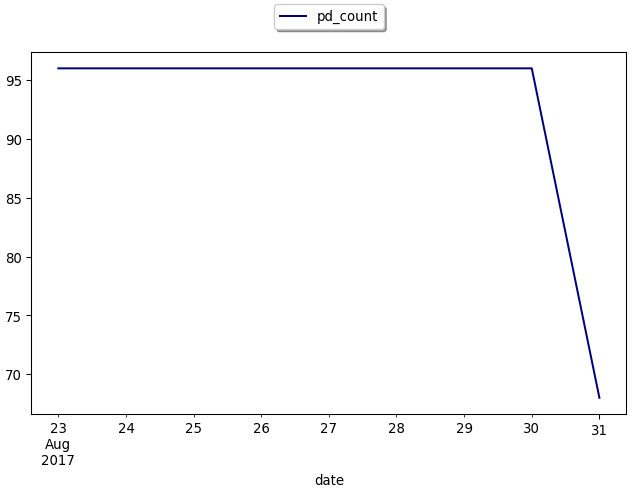

In [11]:
display(hunting)

In [32]:
!wget "https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0"

--2019-03-04 22:51:10--  https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/smvfax2br0ez4bv/houston.geojson [following]
--2019-03-04 22:51:10--  https://www.dropbox.com/s/raw/smvfax2br0ez4bv/houston.geojson
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5aa3231d428ba9a083d935362.dl.dropboxusercontent.com/cd/0/inline/Ace3OaGOa-MvTP-RRKl9R50cPRd34Jm06achR9AfHnKTNLQ2hj0RdykUelFesZWlvER5J-6rf36BU8KcPBC6XOKG3sNC8ITZBm2Vf4sDAPwjyt5dqwZzHp7QJZxm95SDX3E/file# [following]
--2019-03-04 22:51:11--  https://ucb5aa3231d428ba9a083d935362.dl.dropboxusercontent.com/cd/0/inline/Ace3OaGOa-MvTP-RRKl9R50cPRd34Jm06achR9AfHnKTNLQ2hj0RdykUelFesZWlvER5J-6rf36BU8KcPBC6XOKG3sNC8ITZBm2V

In [34]:
!mv houston.geojson?dl=0 houston.geojson
!ls

fHuntingBayou.csv?dl=0	houston.geojson   WhiteoakBayou.csv
foo.csv			HuntingBayou.csv


In [18]:
!wget "https://www.dropbox.com/s/dxr0fis01iudpog/maxFlood.csv?dl=0"

--2019-03-05 17:38:24--  https://www.dropbox.com/s/dxr0fis01iudpog/maxFlood.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dxr0fis01iudpog/maxFlood.csv [following]
--2019-03-05 17:38:24--  https://www.dropbox.com/s/raw/dxr0fis01iudpog/maxFlood.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc5d188295eff93c4c809cb9325.dl.dropboxusercontent.com/cd/0/inline/AcgQOdG_zp_mQLnExh1Tp6jalnRHmfctuK9k6otmRWlXZRe9BxbPJNvh5M_ndochKHuVRBwOHkTkkCW-kM1V5PUacQQA8ni4yCTWF9QxFMB5ZXeV7xnk6UxDF3G7PHdHAHU/file# [following]
--2019-03-05 17:38:25--  https://ucc5d188295eff93c4c809cb9325.dl.dropboxusercontent.com/cd/0/inline/AcgQOdG_zp_mQLnExh1Tp6jalnRHmfctuK9k6otmRWlXZRe9BxbPJNvh5M_ndochKHuVRBwOHkTkkCW-kM1V5PUacQQA8ni4yCTWF9QxFMB5Z

In [19]:
!mv maxFlood.csv?dl=0 maxFlood.csv
!ls

additional_feedback_data.json		HuntingBayou.csv
german_credit_data_biased_training.csv	maxFlood.csv
german_credit_feed.json			WhiteoakBayou.csv


In [20]:
maxFlood = pd.read_csv('maxFlood.csv')

In [21]:
maxFlood

,site_no,date,time,tz_cd,Discharge(cfs),Gage_Height(feet),location_name,latitude,longitude
0,8075770,8/27/17,7:30,CDT,6640,37.10,HuntingBayou,29.808611,-95.313056
1,8074500,8/27/17,5:30,CDT,30700,39.54,WhiteoakBayou,29.775000,-95.396944


In [25]:
display(maxFlood)

In [27]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase

@PixieApp
class HoustonDashboard(MapboxBase):
    def setup(self):
        self.mapJSONOptions = {
      "colorrampname": "Green to Purple",
      "coloropacity": "100",
      "handlerId": "mapView",
      "kind": "simple",
      "mapboxtoken": "pk.eyJ1IjoibWFwYm94IiwiYSI6ImNpejY4M29iazA2Z2gycXA4N2pmbDZmangifQ.-g_vE53SD2WrJ6tFX7QHmA",
      "keyFields": "latitude,longitude",
      "valueFields": "Gage_Height(feet),Discharge(cfs),date,time"
    }
        

        self.setLayers([
        {
            "name": "Houston Flood",
            "url": "https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0",
            "type": "LineString"
        }
        ])
    def formatOptions(self,options):
        return ';'.join(["{}={}".format(key,value) for (key, value) in iteritems(options)])

    @route()
    def mainScreen(self):
        return """
<div class="well">
    <center><span style="font-size:x-large">Analyzing Houston Flood data with PixieDust</span></center>
</div>
<div class="row">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Layers</strong></div>
        {% for layer in this.layers %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="map{{prefix}}" pd_script="self.toggleLayer({{loop.index0}})">
            <label>{{layer["name"]}}</label>
        </div>
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <div id="map{{prefix}}" pd_entity pd_options="{{this.formatOptions(this.mapJSONOptions)}}"/>
    </div>
</div>
"""

HoustonDashboard().run(maxFlood,runInDialog="false")
